In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from collections import Counter


In [1]:
import random
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import nibabel
import cv2
import numpy as np
import nibabel as nib
from nibabel import load
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import rotate
from IPython.display import Image, display
from skimage.exposure import rescale_intensity
from skimage.segmentation import mark_boundaries
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback
from sklearn.model_selection import KFold
from keras.models import Model
from collections import Counter
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Loss

In [14]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt


#########################
def preprocess_volume(volume):
    pad_x = max(0, 256 - volume.shape[0])
    pad_y = max(0, 256 - volume.shape[1])
    #pad_z = max(0, 40 - volume.shape[2])
    pad_width = ((0, pad_x), (0, pad_y), (0, volume.shape[2]))
    volume_padded = np.pad(volume, pad_width, mode='constant', constant_values=0.0)
   

    return volume_padded
    ########################

image_directory = 'test/multi_label2/adult/fatfrac_adults/'
mask_directory = 'test/multi_label2/adult/multiadults/'


num_classes = 10 

image_dataset3 = []  
mask_dataset3 = []
sliced_image_dataset3 = []
sliced_mask_dataset3 = []
image_filenames3 =[]
image_slices_filenames3 =[]
mask_filenames3 =[]
mask_slices_filenames3 =[]


images = os.listdir(image_directory)
images.sort()
for i, image_name in enumerate(images):    
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(image_directory+image_name)
        image = np.array(image.get_fdata())
           #################
        image = preprocess_volume(image)  # Preprocess the image
        image_dataset3.append(np.array(image))


        image_filenames3.append(os.path.splitext(image_name)[0]) 

masks = os.listdir(mask_directory)
masks.sort()
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(mask_directory+image_name)
        image = np.array(image.get_fdata())
           #################
        image = preprocess_volume(image)  # Preprocess the image
        mask_dataset3.append(np.array(image))

        mask_filenames3.append(os.path.splitext(image_name)[0]) 


for i in range(len(image_dataset3)):
    for j in range(image_dataset3[i].shape[2]):
        sliced_image_dataset3.append(image_dataset3[i][:,:,j])
        
        image_slice_id3 = f'{image_filenames3[i]}-slice{j}'
        image_slices_filenames3.append(image_slice_id3)


for i in range(len(mask_dataset3)):
    for j in range(mask_dataset3[i].shape[2]):
        
        sliced_mask_dataset3.append(mask_dataset3[i][:,:,j])
        mask_slice_id3 = f'{mask_filenames3[i]}-slice{j}'
        mask_slices_filenames3.append(mask_slice_id3)

print(f"Total sliced images: {len(sliced_image_dataset3)}")
print(f"Total sliced masks: {len(sliced_mask_dataset3)}")



image_directory = 'test/multi_label2/peds/fatfrac_peds/'
mask_directory = 'test/multi_label2/peds/multipeds/'
image_dataset2 = []  
mask_dataset2 = []
sliced_image_dataset2 = []
sliced_mask_dataset2 = []
image_filenames2 =[]
image_slices_filenames2 =[]
mask_filenames2 =[]
mask_slices_filenames2 =[]


images = os.listdir(image_directory)
images.sort()
for i, image_name in enumerate(images):    
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(image_directory+image_name)
        image = np.array(image.get_fdata())
           #################
        image = preprocess_volume(image)  # Preprocess the image
        image_dataset2.append(np.array(image))


        image_filenames2.append(os.path.splitext(image_name)[0]) 

masks = os.listdir(mask_directory)
masks.sort()
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(mask_directory+image_name)
        image = np.array(image.get_fdata())
           #################
        image = preprocess_volume(image)  # Preprocess the image
        mask_dataset2.append(np.array(image))

        mask_filenames2.append(os.path.splitext(image_name)[0]) 


for i in range(len(image_dataset2)):
    for j in range(image_dataset2[i].shape[2]):
        sliced_image_dataset2.append(image_dataset2[i][:,:,j])
        
        image_slice_id2 = f'{image_filenames2[i]}-slice{j}'
        image_slices_filenames2.append(image_slice_id2)


for i in range(len(mask_dataset2)):
    for j in range(mask_dataset2[i].shape[2]):
        if mask_filenames2[i] == 'f_3325' and j==31:
            continue
        else:
            sliced_mask_dataset2.append(mask_dataset2[i][:,:,j])
            mask_slice_id2 = f'{mask_filenames2[i]}-slice{j}'
            mask_slices_filenames2.append(mask_slice_id2)

print(f"Total sliced images: {len(sliced_image_dataset2)}")
print(f"Total sliced masks: {len(sliced_mask_dataset2)}")


sliced_image_dataset = np.concatenate((sliced_image_dataset2,sliced_image_dataset3))
sliced_mask_dataset = np.concatenate((sliced_mask_dataset2, sliced_mask_dataset3))

print(f"Combined sliced images: {len(sliced_image_dataset)}")
print(f"Combined sliced masks: {len(sliced_mask_dataset)}")







   
  

Total sliced images: 276
Total sliced masks: 276
Total sliced images: 248
Total sliced masks: 248
Combined sliced images: 524
Combined sliced masks: 524


In [15]:
labelencoder = LabelEncoder()
n, h, w = sliced_mask_dataset.shape
sliced_masks_reshaped = sliced_mask_dataset.reshape(-1,1)



In [16]:
sliced_masks_reshaped_encoded = labelencoder.fit_transform(sliced_masks_reshaped)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
sliced_masks_encoded_original_shape = sliced_masks_reshaped_encoded.reshape(n, h, w)
print(np.unique(sliced_masks_encoded_original_shape))


[0 1 2 3 4 5 6 7 8 9]


In [18]:
sliced_image_dataset = np.expand_dims(sliced_image_dataset, axis=3)
sliced_image_dataset = normalize(sliced_image_dataset, axis=1)
sliced_mask_dataset = np.expand_dims(sliced_masks_encoded_original_shape, axis=3)


In [19]:
sliced_image_dataset.shape

(524, 256, 256, 1)

In [20]:
sliced_mask_dataset.shape

(524, 256, 256, 1)

Epoch 1/2
27/27 [==============================] - 623s 23s/step - loss: 1.9065 - <lambda>: 0.0662 - true_positive_rate: 0.5067 - false_positive_rate: 0.0048 - val_loss: 2.3574 - val_<lambda>: 0.0054 - val_true_positive_rate: 0.0046 - val_false_positive_rate: 0.0338
Epoch 2/2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 592s 22s/step - loss: 1.6930 - <lambda>: 0.0876 - true_positive_rate: 0.7726 - false_positive_rate: 4.2997e-04 - val_loss: 2.2422 - val_<lambda>: 0.0260 - val_true_positive_rate: 0.0258 - val_false_positive_rate: 0.0514


KeyError: 'dice_coef'

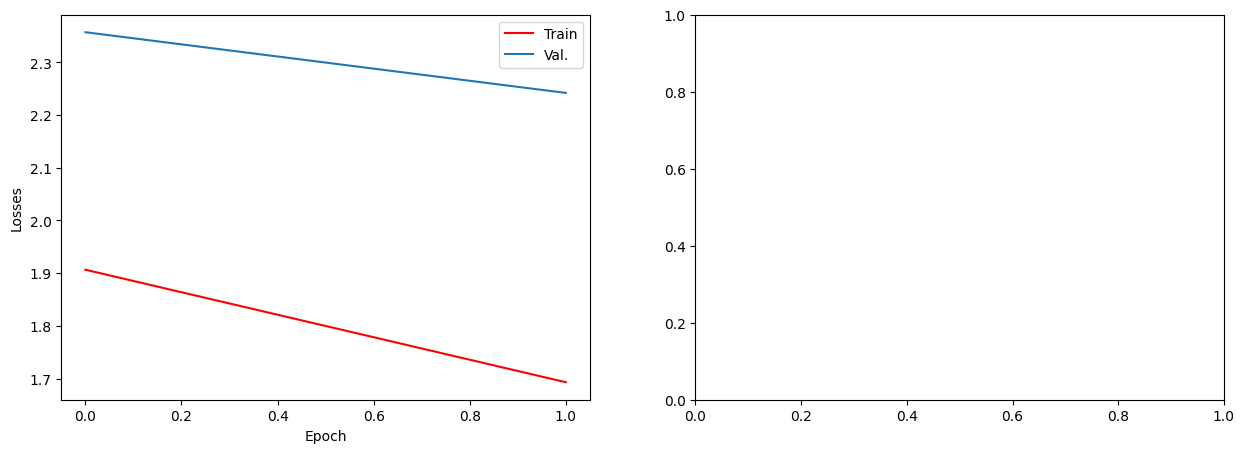

In [22]:
# Building the SegNet Model

batch_size = 16 # The batch size to use when training the model
image_size = (256, 256)  # The size of the images

import tensorflow as tf
import tifffile as tiff
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import random

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Concatenate, Dropout

from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Building the SegNet Model

def encoder_block(input_tensor, n_filters, kernel_size=3, batchnorm=True, dropout_rate=0.1):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)

    if dropout_rate>0:
        x = Dropout(dropout_rate)(x)



    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def decoder_block(input_tensor, skip_tensor, n_filters, kernel_size=3, batchnorm=True, dropout_rate=0.1):
    x = UpSampling2D(size=(2, 2), interpolation='bilinear')(input_tensor)
    x = Concatenate()([x, skip_tensor])
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)



    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)



    
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def get_segnet_model(input_img, n_filters=64, n_classes=10, dropout=0.1, batchnorm=True):
    # Contracting Path (encoder)
    c1 = encoder_block(input_img, n_filters * 1, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = encoder_block(p1, n_filters * 2, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = encoder_block(p2, n_filters * 4, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = encoder_block(p3, n_filters * 8, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    p4 = MaxPooling2D((2, 2))(c4)
    
    # Expanding Path (decoder)
    u6 = decoder_block(c4, c3, n_filters * 4, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    u7 = decoder_block(u6, c2, n_filters * 2, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    u8 = decoder_block(u7, c1, n_filters * 1, kernel_size=3, batchnorm=batchnorm, dropout_rate=dropout)
    
    # Output layer
    output_img = Conv2D(n_classes, (1, 1), activation='softmax')(u8)
    
    return Model(inputs=input_img, outputs=output_img)


from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf

class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, class_weights, gamma=0.2, name='focal_loss'):
        super().__init__(name=name)
        self.gamma = gamma
        self.class_weights = class_weights

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.nn.softmax(y_pred, axis=-1)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = self.class_weights * tf.pow(1 - y_pred, self.gamma) * cross_entropy
        loss = tf.reduce_sum(loss, axis=-1)
        return tf.reduce_mean(loss)

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_multiclass(y_true, y_pred, num_classes, smooth=1):
    dice = 0
    for i in range(num_classes):
        dice += dice_coef(y_true[..., i], y_pred[..., i], smooth)
    return dice / num_classes



def true_positive_rate(y_true, y_pred, threshold=0.5):
    y_pred_pos = tf.cast(y_pred > threshold, tf.float32)
    y_true_pos = tf.cast(y_true > threshold, tf.float32)
    
    # Use `tf.logical_and` directly from TensorFlow
    true_pos = tf.reduce_sum(tf.cast(tf.logical_and(y_true_pos == 1, y_pred_pos == 1), tf.float32))
    actual_pos = tf.reduce_sum(tf.cast(y_true_pos, tf.float32))
    
    tpr = true_pos / (actual_pos + tf.keras.backend.epsilon())
    return tpr

def false_positive_rate(y_true, y_pred, threshold=0.5):
    y_pred_pos = tf.cast(y_pred > threshold, tf.float32)
    y_true_neg = tf.cast(y_true <= threshold, tf.float32)
    
    # Use `tf.logical_and` directly from TensorFlow
    false_pos = tf.reduce_sum(tf.cast(tf.logical_and(y_true_neg == 1, y_pred_pos == 1), tf.float32))
    actual_neg = tf.reduce_sum(tf.cast(y_true_neg, tf.float32))
    
    fpr = false_pos / (actual_neg + tf.keras.backend.epsilon())
    return fpr


from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr(y_true, y_pred):
    # Assuming y_pred is sigmoid output, threshold to get binary mask
    y_pred = y_pred > 0.5
    # Flatten the arrays to compute confusion matrix
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    
    cm = confusion_matrix(y_true_f, y_pred_f).ravel()
    
    # Depending on the shape of the confusion matrix, unpack accordingly
    if cm.shape[0] == 4:  # If we have a full 2x2 matrix
        tn, fp, fn, tp = cm
    elif cm.shape[0] == 1:  # If we only have one value, it means only one class was predicted
        # Check which class is present
        if np.unique(y_true_f).item() == 1:  # Only positives are present
            tp = cm[0]
            tn = fp = fn = 0
        else:  # Only negatives are present
            tn = cm[0]
            tp = fp = fn = 0
    else:  # This is for the case where the confusion matrix might be 2 elements long (only 2 out of tp, fp, tn, fn are present)
        raise ValueError("Unexpected confusion matrix shape.")
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Handling division by zero
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Handling division by zero
    
    return tpr, fpr

def calculate_class_weights(labels):
    class_count = Counter(labels)
    total = sum(class_count.values())
    classes = sorted(class_count.keys())
    class_weights = [total / (len(class_count) * class_count[cls]) for cls in classes]
    return class_weights


from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 30
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

lr_scheduler = LearningRateScheduler(lr_scheduler, verbose=1)


labels = np.argmax(sliced_mask_dataset, axis=-1).flatten()
class_weights = calculate_class_weights(labels)
class_weights /= np.sum(class_weights)
focal_loss = FocalLoss(class_weights=class_weights, gamma=0.2)


from sklearn.model_selection import KFold

#change number of folds as needed 
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=20)
histories = []
TPRs =[]
FPRs =[]



# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(sliced_image_dataset, sliced_mask_dataset)):
    if i==2:
        break 
    X_train, X_test = sliced_image_dataset[train_index], sliced_image_dataset[test_index]
    y_train, y_test = sliced_mask_dataset[train_index], sliced_mask_dataset[test_index]
    all_test_indices = []
    all_test_indices.append(test_index)
    all_test_indices = np.array(all_test_indices)
    '''

    f = open("C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/test_index.txt", "a")
    np.set_printoptions(threshold=2000)
    f.write(f'fold{i}')
    for indices in all_test_indices:
        print(f'{indices}\n',file=f)
    
    f.close()
    '''


    x_train_expanded = np.expand_dims(X_train, axis=-1)
    X_test_expanded = np.expand_dims(X_test, axis=-1)

    y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)





    checkpoint = ModelCheckpoint(f'best_model{i}.h5', monitor='val_loss', save_best_only=True)
    # Model setup and training
    input_img=Input((256,256,1),name='img')
    model = get_segnet_model(input_img)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=focal_loss,   
                  metrics=[lambda y_true, y_pred: dice_coef_multiclass(y_true, y_pred, num_classes=10),
                           true_positive_rate, false_positive_rate])



    history = model.fit(x_train_expanded, y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=2,
                        validation_data=(X_test_expanded, y_test),
                        shuffle=False,
                        callbacks=[checkpoint])


    histories.append(history)


    #plot for loss 
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], color='r')
    plt.plot(history.history['val_loss'])
    plt.ylabel('Losses')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val.'], loc='upper right')

    #plot for dice
    plt.subplot(1,2,2)
    plt.plot(history.history['dice_coef'], color='r')
    plt.plot(history.history['val_dice_coef'])
    plt.ylabel('dice_coef')
    plt.xlabel('Epoch')
    plt.tight_layout()
    plt.savefig(f'C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/process{i}.png')
    plt.close()


    max_dice_coef = max(history.history['dice_coef'])
    max_val_dice_coef = max(history.history['val_dice_coef'])
    max_tpr = max(history.history['true_positive_rate'])
    min_fpr = min(history.history['false_positive_rate'])
    max_val_tpr = max(history.history['true_positive_rate'])
    min_val_fpr = min(history.history['false_positive_rate'])


    f = open("C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/output.txt", "a")
    print(f'max_dice_coef:{max_dice_coef}', file=f)
    print(f'max_val_dice_coef:{max_val_dice_coef}', file=f)
    print(f'max_tpr:{max_tpr}', file=f)
    print(f'min_fpr:{min_fpr}', file=f)
    print(f'max_tpr:{max_val_tpr}', file=f)
    print(f'min_fpr:{min_val_fpr}', file=f)
    f.close()

    model.load_weights(f'C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/best_model{i}.h5')
    model.save(f'C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/final_model{i}.h5')

        
    #5 test images 
    for z in range(10):
        

        test_img_number = random.randint(0, len(X_test))
        test_img = X_test[test_img_number]
        ground_truth = y_test[test_img_number]
        #test_img_norm = test_img[:,:,0][:,:,None]
        test_img_input = np.expand_dims(test_img, axis=0)
        prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

        original_image_normalized = ground_truth.astype(float) / np.max(ground_truth)
        colored_mask = plt.get_cmap('jet')(prediction / np.max(prediction))
        alpha = 0.5 
        colored_mask[..., 3] = np.where(prediction > 0, alpha, 0)

        
        
        
        tpr, fpr = calculate_tpr_fpr(ground_truth, prediction)
        print(f'TPR={tpr}')
        print(f'FPR={fpr}')

        TPRs.append(tpr)
        FPRs.append(fpr)
        
        plt.figure(figsize=(16, 8))
        plt.subplot(141)
        plt.title('Testing Image')
        plt.imshow(test_img[:,:], cmap='gray')
        plt.subplot(142)
        plt.title('Testing Mask')
        plt.imshow(ground_truth[:,:], cmap='gray')
        plt.subplot(143)
        plt.title('Prediction on test image')
        plt.imshow(prediction, cmap='gray')
        plt.subplot(144)
        plt.title("Overlayed Images")
        plt.imshow(original_image_normalized, cmap='gray')
        plt.imshow(colored_mask, cmap='jet')
        plt.savefig(f'C:/Users/Mittal/Desktop/2Dsegnet_fatfrac/predict/fold{i}_{z}.png')
        plt.close()
        



   

   
  